In [13]:
import pandas_datareader as pdr
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance

In [6]:
start = "2014-1-1"
end = "2021-6-10"

## DISNEY

In [7]:
dis = yfinance.download("DIS", start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
dis.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,176.270004,176.970001,175.419998,176.240005,175.667480,5583900
2021-06-04,175.929993,177.520004,175.610001,177.179993,176.604416,6343400
2021-06-07,177.970001,178.070007,176.399994,176.990005,176.415054,5178100
2021-06-08,175.970001,177.119995,175.190002,176.330002,175.757187,5356200
2021-06-09,176.309998,177.330002,175.880005,176.039993,175.468124,5082400


In [9]:
dis = dis.drop(columns = ["Open", "High", "Low", "Adj Close", "Volume"])

In [10]:
dis["returns"] = dis.Close.pct_change(1).mul(100)
dis["sq_returns"] = dis.returns.mul(dis.returns)

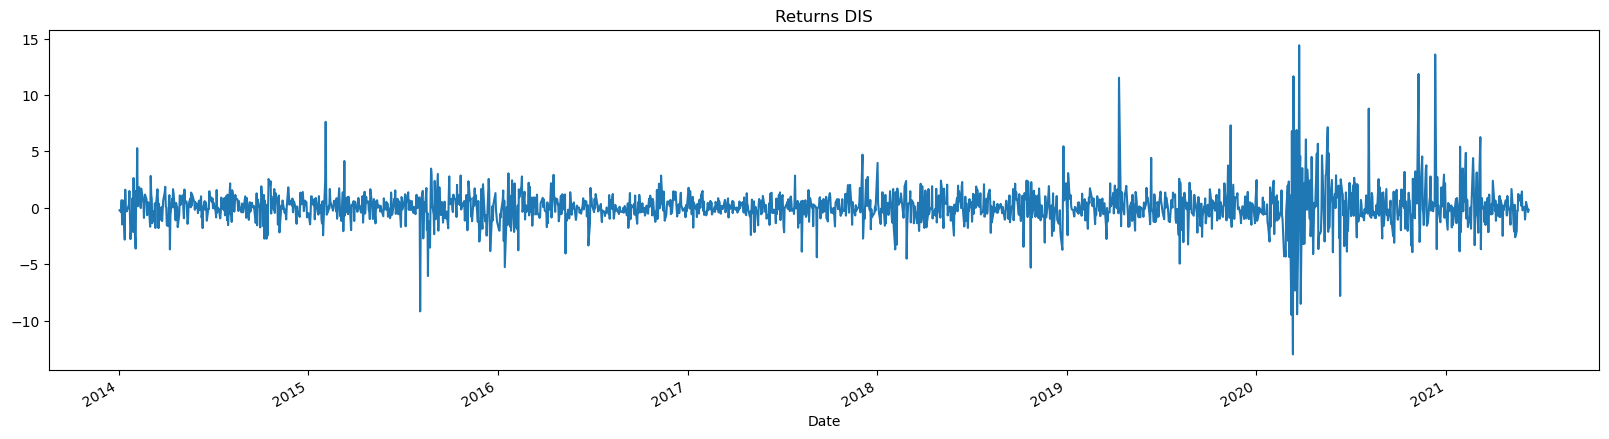

In [11]:
dis.returns.plot(figsize = (20,5))
plt.title("Returns DIS")
plt.show()

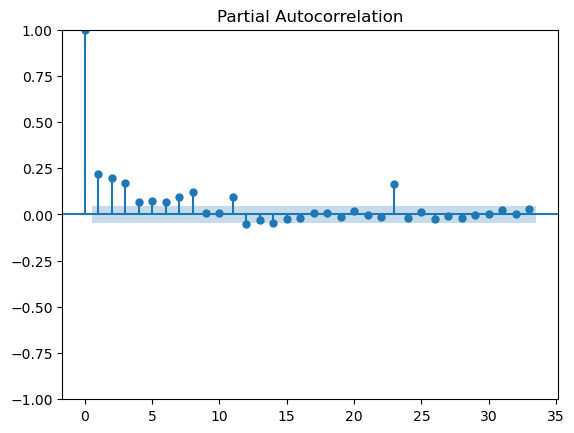

In [14]:
plot_pacf(dis.sq_returns[1:], method = "ols")
plt.show()

So we fit a GARCH(3,3)

In [15]:
model_garch_33 = arch_model(dis.returns[1:], p = 3, q = 3)
results_garch_33 = model_garch_33.fit()
results_garch_33.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9232.870677524
Iteration:      2,   Func. Count:     24,   Neg. LLF: 41717199702.92915
Iteration:      3,   Func. Count:     36,   Neg. LLF: 4491.803514596922
Iteration:      4,   Func. Count:     47,   Neg. LLF: 3891.0807763143516
Iteration:      5,   Func. Count:     58,   Neg. LLF: 4013.149948148823
Iteration:      6,   Func. Count:     69,   Neg. LLF: 3323.08033236504
Iteration:      7,   Func. Count:     79,   Neg. LLF: 3272.3954014855
Iteration:      8,   Func. Count:     89,   Neg. LLF: 3281.553077466065
Iteration:      9,   Func. Count:     99,   Neg. LLF: 3267.8290346333642
Iteration:     10,   Func. Count:    109,   Neg. LLF: 3266.2385226506512
Iteration:     11,   Func. Count:    119,   Neg. LLF: 3269.8468042576196
Iteration:     12,   Func. Count:    129,   Neg. LLF: 3261.9687649196994
Iteration:     13,   Func. Count:    138,   Neg. LLF: 3261.812178770854
Iteration:     14,   Func. Count:    147,   Neg. LLF: 3261.669959

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3261.36
Distribution:                  Normal   AIC:                           6538.72
Method:            Maximum Likelihood   BIC:                           6582.99
                                        No. Observations:                 1871
Date:                Thu, Mar 21 2024   Df Residuals:                     1870
Time:                        20:22:32   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0204  3.314e-02      0.615      0.539 [-4.458e-02,8.534e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1298  9.449e-02      1.374      0.169   [-5.536e-02,  0.315]
alpha[1]       0.0348  2.681e-02      1.299      0.194 [-1.773e-02,8.736e-02]
alpha[2]       0.0872  9.161e-02      0.952      0.341   [-9.231e-02,  0.267]
alpha[3]       0.1173      0.117      1.006      0.314      [ -0.111,  0.346]
beta[1]        0.0000      0.137      0.000      1.000      [ -0.268,  0.268]
beta[2]        0.0367      0.144      0.255      0.799      [ -0.245,  0.319]
beta[3]        0.6923      0.106      6.537  6.276e-11      [  0.485,  0.900]
=============================================================================

Covariance estimator: robust
"""

Not so good, beta coefficients aren't significant so we'll try ARCH(3)

In [16]:
model_arch_3 = arch_model(dis.returns[1:], p = 3, q = 0)
results_arch_3 = model_arch_3.fit()
results_arch_3.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6643.522449090959
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8956.788320077972
Iteration:      3,   Func. Count:     25,   Neg. LLF: 951392.1895470368
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1128320.814634379
Iteration:      5,   Func. Count:     39,   Neg. LLF: 4165.008143526229
Iteration:      6,   Func. Count:     47,   Neg. LLF: 144122.12258419886
Iteration:      7,   Func. Count:     54,   Neg. LLF: 3418.082717217372
Iteration:      8,   Func. Count:     61,   Neg. LLF: 3328.9849491005543
Iteration:      9,   Func. Count:     68,   Neg. LLF: 3322.554198098832
Iteration:     10,   Func. Count:     74,   Neg. LLF: 3322.3652341813504
Iteration:     11,   Func. Count:     80,   Neg. LLF: 3322.3145235116217
Iteration:     12,   Func. Count:     86,   Neg. LLF: 3322.3132308925315
Iteration:     13,   Func. Count:     92,   Neg. LLF: 3322.3131473801104
Iteration:     14,   Func. Count:     98,   Neg. LLF: 3322

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3322.31
Distribution:                  Normal   AIC:                           6654.63
Method:            Maximum Likelihood   BIC:                           6682.30
                                        No. Observations:                 1871
Date:                Thu, Mar 21 2024   Df Residuals:                     1870
Time:                        20:22:41   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0217  3.780e-02      0.575      0.565 [-5.234e-02,9.581e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1831      0.284      4.161  3.173e-05    [  0.626,  1.740]
alpha[1]       0.0495  2.779e-02      1.780  7.501e-02 [-4.989e-03,  0.104]
alpha[2]       0.3397      0.116      2.930  3.387e-03    [  0.112,  0.567]
alpha[3]       0.2301      0.127      1.805  7.107e-02 [-1.975e-02,  0.480]
===========================================================================

Covariance estimator: robust
"""

### Rolling predictions

In [17]:
rolling_predictions = []
test_size = 365
for i in range(test_size):
    train = dis.returns[1:-(test_size-i)]
    model = arch_model(train, p = 3, q = 0)
    results = model.fit(disp = "off")
    pred = results.forecast(horizon = 1, reindex = True)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1][0]))

In [18]:
rolling_predictions_df = pd.DataFrame(rolling_predictions, index = dis.index[-365:], columns = ["Predictions"])

In [19]:
rolling_predictions_df

,Predictions
Date,
2019-12-27,1.276988
2019-12-30,0.962515
2019-12-31,0.991631
2020-01-02,1.087902
2020-01-03,1.341786
...,...
2021-06-03,1.122543
2021-06-04,1.254878
2021-06-07,1.234367


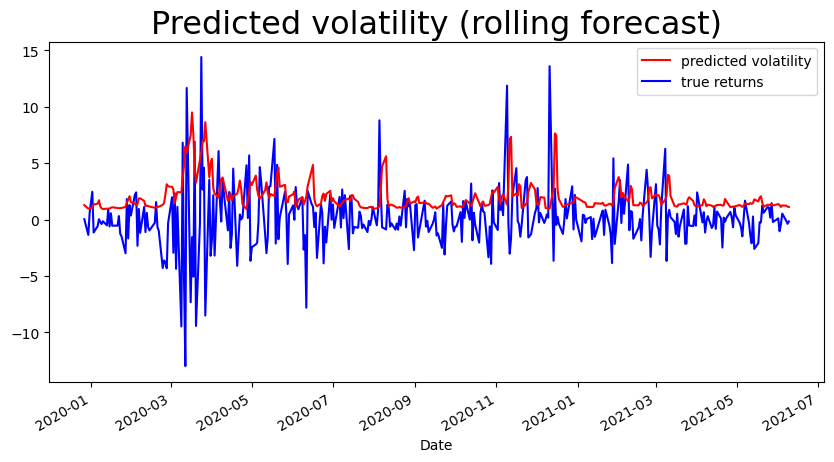

In [21]:
rolling_predictions_df.Predictions.plot(figsize = (10,5), color = "red", zorder = 2)
dis.returns[-365:].plot(color = "blue", zorder = 1)
plt.title("Predicted volatility (rolling forecast)", size = 23)
plt.legend(["predicted volatility", "true returns"])
plt.show()

## S&P 500

In [28]:
start = "2000-01-01"
end = "2022-6-10"

In [29]:
spx = yfinance.download("^GSPC", start = start, end = end, interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [30]:
spx.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
spx = spx.drop(columns = ["Open", "High", "Low", "Adj Close", "Volume"])
spx["returns"] = spx.Close.pct_change(1).mul(100)
spx["sq_returns"] = spx.returns.mul(spx.returns)

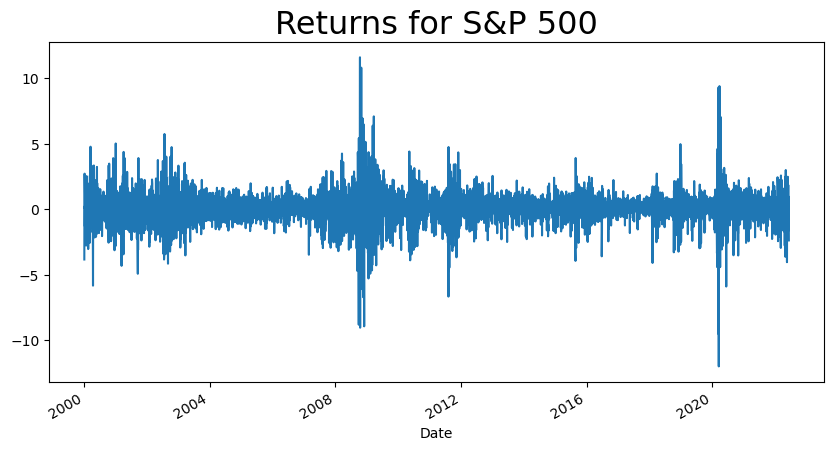

In [32]:
spx.returns[1:].plot(figsize = (10,5))
plt.title("Returns for S&P 500", size = 23)
plt.show()

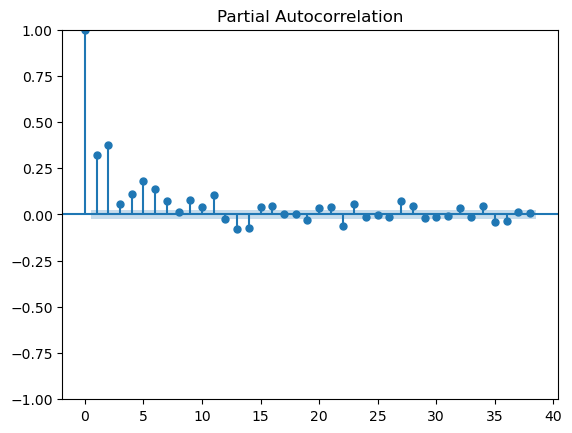

In [33]:
plot_pacf(spx.sq_returns[1:], method = "ols")
plt.show()

In [34]:
model_garch_22 = arch_model(spx.returns[1:], p = 2, q = 2)
results_garch_22 = model_garch_22.fit()
results_garch_22.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 98758.57133419036
Iteration:      2,   Func. Count:     20,   Neg. LLF: 33797.67322314944
Iteration:      3,   Func. Count:     31,   Neg. LLF: 12041.856664339766
Iteration:      4,   Func. Count:     40,   Neg. LLF: 11054.475398879076
Iteration:      5,   Func. Count:     49,   Neg. LLF: 9338.472040163706
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7952.165369526607
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7813.405113229788
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7778.48194410256
Iteration:      9,   Func. Count:     81,   Neg. LLF: 7778.2487171053535
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7772.129835198547
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7772.11469507956
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7772.114558314998
Iteration:     13,   Func. Count:    111,   Neg. LLF: 7772.114556391651
Iteration:     14,   Func. Count:    117,   Neg. LLF: 7772.1145

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7772.11
Distribution:                  Normal   AIC:                           15556.2
Method:            Maximum Likelihood   BIC:                           15596.1
                                        No. Observations:                 5645
Date:                Thu, Mar 21 2024   Df Residuals:                     5644
Time:                        20:24:51   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0642  1.072e-02      5.993  2.055e-09 [4.324e-02,8.526e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0428  9.699e-03      4.416  1.007e-05 [2.382e-02,6.184e-02]
alpha[1]       0.0881  2.281e-02      3.862  1.123e-04   [4.339e-02,  0.133]
alpha[2]       0.1311  2.696e-02      4.863  1.155e-06   [7.828e-02,  0.184]
beta[1]        0.2402      0.296      0.813      0.416     [ -0.339,  0.820]
beta[2]        0.5103      0.263      1.941  5.230e-02  [-5.072e-03,  1.026]
============================================================================

Covariance estimator: robust
"""

In [35]:
model_garch_21 = arch_model(spx.returns[1:], p = 2, q = 1)
results_garch_21 = model_garch_21.fit()
results_garch_21.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 79052.69280440579
Iteration:      2,   Func. Count:     19,   Neg. LLF: 34583.119221838875
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1228678424.986454
Iteration:      4,   Func. Count:     37,   Neg. LLF: 12777.741656430891
Iteration:      5,   Func. Count:     45,   Neg. LLF: 7796.636798393822
Iteration:      6,   Func. Count:     52,   Neg. LLF: 7948.043173720173
Iteration:      7,   Func. Count:     59,   Neg. LLF: 7807.945354860401
Iteration:      8,   Func. Count:     66,   Neg. LLF: 7844.666655162339
Iteration:      9,   Func. Count:     73,   Neg. LLF: 7773.62450845716
Iteration:     10,   Func. Count:     79,   Neg. LLF: 7773.622536630428
Iteration:     11,   Func. Count:     85,   Neg. LLF: 7773.622437919774
Iteration:     12,   Func. Count:     91,   Neg. LLF: 7773.6224368244975
Iteration:     13,   Func. Count:     96,   Neg. LLF: 7773.622436825346
Optimization terminated successfully    (Exit mode 0)
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7773.62
Distribution:                  Normal   AIC:                           15557.2
Method:            Maximum Likelihood   BIC:                           15590.4
                                        No. Observations:                 5645
Date:                Thu, Mar 21 2024   Df Residuals:                     5644
Time:                        20:24:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0635  1.072e-02      5.925  3.119e-09 [4.252e-02,8.456e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0298  6.630e-03      4.500  6.787e-06 [1.684e-02,4.283e-02]
alpha[1]       0.0852  2.201e-02      3.871  1.086e-04   [4.205e-02,  0.128]
alpha[2]       0.0638  2.786e-02      2.290  2.200e-02   [9.203e-03,  0.118]
beta[1]        0.8301  1.933e-02     42.954      0.000     [  0.792,  0.868]
============================================================================

Covariance estimator: robust
"""

### Rolling predictions

In [36]:
rolling_predictions = []
test_size = 365*5
for i in range(test_size):
    train = spx.returns[1:-(test_size-i)]
    model = arch_model(train, p = 2, q = 1)
    results = model.fit(disp = "off")
    pred = results.forecast(horizon = 1, reindex = True)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1][0]))

In [37]:
rolling_predictions_df = pd.DataFrame(rolling_predictions, index = spx.index[-365*5:], columns = ["Predictions"])
rolling_predictions_df

,Predictions
Date,
2015-03-13,0.893958
2015-03-16,0.934973
2015-03-17,0.921889
2015-03-18,0.968777
2015-03-19,0.931700
...,...
2022-06-03,1.582866
2022-06-06,1.599319
2022-06-07,1.530190


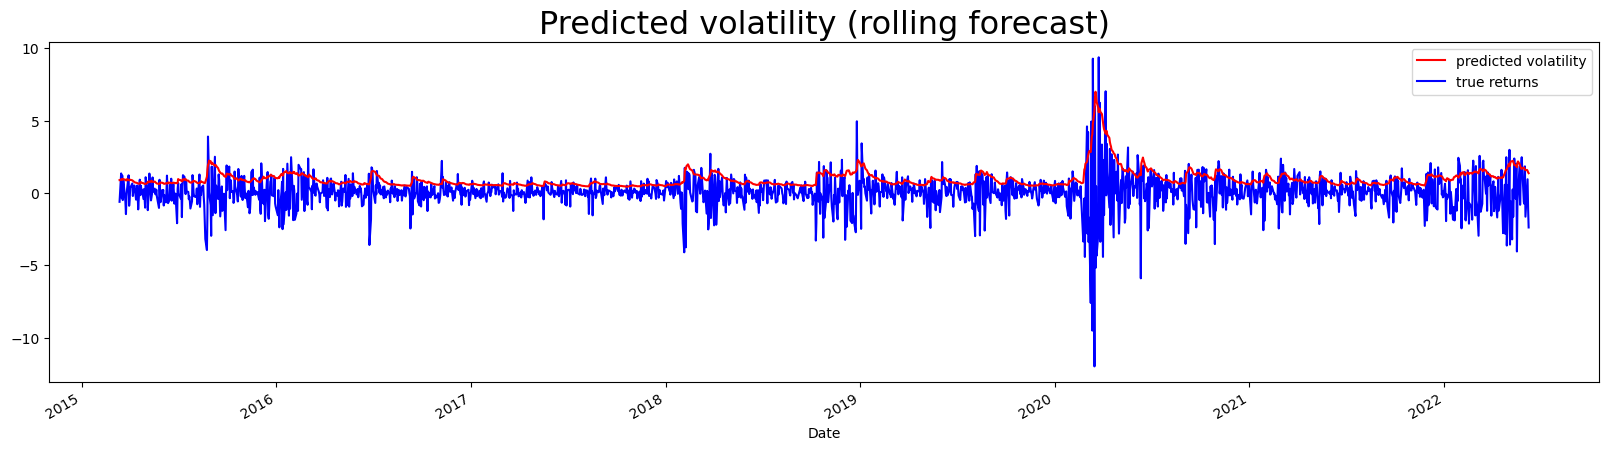

In [38]:
rolling_predictions_df.Predictions.plot(figsize = (20,5), color = "red", zorder = 2)
spx.returns[-365*5:].plot(color = "blue", zorder = 1)
plt.title("Predicted volatility (rolling forecast)", size = 23)
plt.legend(["predicted volatility", "true returns"])
plt.show()

### Use the model

In [39]:
train = spx.returns[1:]
model = arch_model(train, p = 2, q = 2)
results = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 98758.57133419036
Iteration:      2,   Func. Count:     20,   Neg. LLF: 33797.67322314944
Iteration:      3,   Func. Count:     31,   Neg. LLF: 12041.856664339766
Iteration:      4,   Func. Count:     40,   Neg. LLF: 11054.475398879076
Iteration:      5,   Func. Count:     49,   Neg. LLF: 9338.472040163706
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7952.165369526607
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7813.405113229788
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7778.48194410256
Iteration:      9,   Func. Count:     81,   Neg. LLF: 7778.2487171053535
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7772.129835198547
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7772.11469507956
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7772.114558314998
Iteration:     13,   Func. Count:    111,   Neg. LLF: 7772.114556391651
Iteration:     14,   Func. Count:    117,   Neg. LLF: 7772.1145

In [40]:
pred = results.forecast(horizon = 7, reindex = True)
future_dates = []
for i in range(1,8):
    future_dates.append(spx.returns[1:].index[-1] + timedelta(days = i))
pred = pd.DataFrame(data = np.sqrt(pred.variance.values[-1]), index = future_dates, columns = ["predicted_vol"])

In [41]:
spx.tail()

,Close,returns,sq_returns
Date,,,
2022-06-03,4108.540039,-1.634731,2.672347
2022-06-06,4121.430176,0.313740,0.098433
2022-06-07,4160.680176,0.952339,0.906950
2022-06-08,4115.770020,-1.079395,1.165093
2022-06-09,4017.820068,-2.379869,5.663778


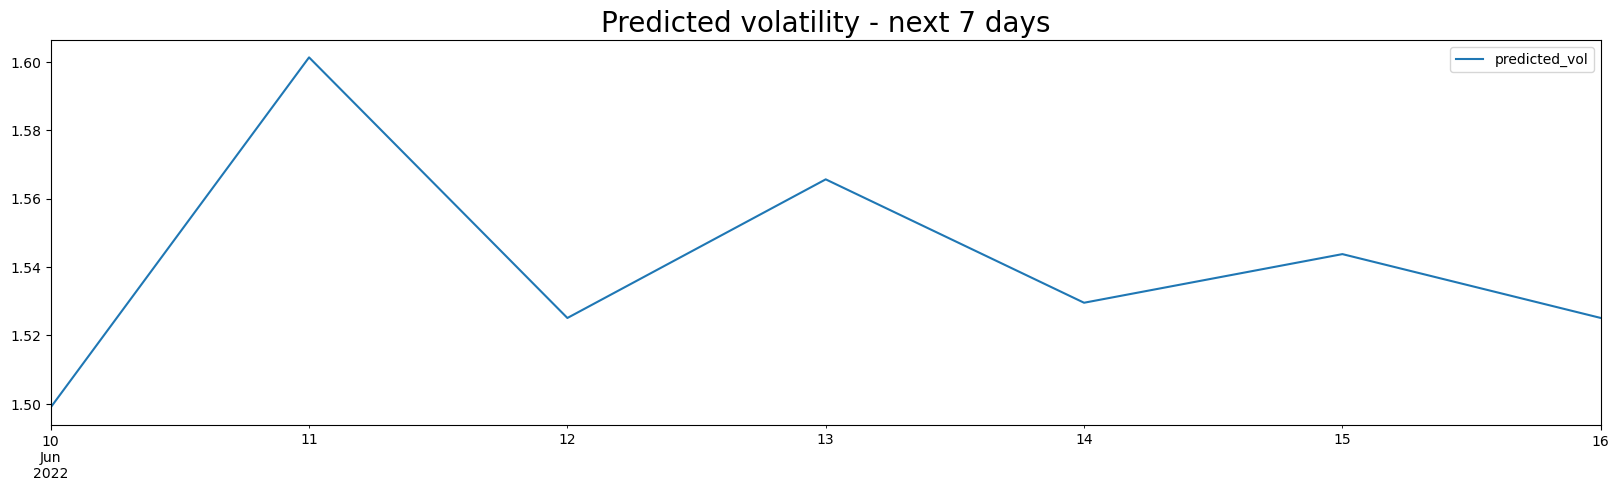

In [42]:
pred.plot(figsize = (20,5))
plt.title("Predicted volatility - next 7 days", size = 20)
plt.show()